# Exercise 1

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import random

The first dataset I used was 'dist.csv' from the 3rd assignment as it has 2 features and is easy to visualize.

In [35]:
data = np.loadtxt('dist.csv', delimiter=';', dtype='float64', encoding='utf-8-sig')
X = data[:, :2]

I did not understood the instructions so I implemented both Kmean and Bisecting Kmean independently. You will be able to find both Kmeans and BisectingKmeans classes in the folder with their respective bkmans and kmeans functions

In [36]:
np.random.shuffle(X)

In [37]:
def split_in_two(X):
    m_length = X.shape[0]
    if m_length % 2 == 0:
        m_length = int(m_length/2)
        return X[:m_length], X[m_length:]
    elif m_length % 2 == 1:
        m_length = int(m_length/2)
        return X[:m_length], X[m_length:]

In [38]:
#Faudrait faire un truc du style pour X in list of clusters
def calculate_centroids(X):
    centroid_coordinates = []
    for i in range(X.shape[1]):
        centroid_coordinates.append(np.sum(X[:,i])/X.shape[0])
    return centroid_coordinates

In [39]:
def calculate_sse(X, centroid):
    result = 0
    for i in range(X.shape[0]):
        for j in range(X.shape[1]-1):
            result += (X[i][j] - centroid[j])**2
    return result

In [40]:
def reassign(X1, X2, centroid1, centroid2):
    X = np.vstack((X1, X2))
    split1 = np.empty((0, X.shape[1]))
    split2 = np.empty((0, X.shape[1]))
    for i in range(X.shape[0]):
    # For every elements in X1
        #First we initialize a calculation number
        calculation1 = 0
        calculation2 = 0
        for j in range(X.shape[1] - 1):
            calculation1 += (X[i][j] - centroid1[j])**2
            calculation2 += (X[i][j] - centroid2[j])**2
        if calculation1 > calculation2:
            split1 = np.vstack((split1, X[i]))
        else:
            split2 = np.vstack((split2, X[i]))
    return split2, split1

In [41]:
def sort_by_sse(cluster):
    centroid = calculate_centroids(cluster)
    return calculate_sse(cluster, centroid)

In [42]:
def bkmeans(X, k, iteration, bool):
        list_of_clusters = []
        index_array = np.arange(X.shape[0]).reshape(-1, 1)
        X = np.hstack((X, index_array))
        list_of_clusters.append(X)
        for i in range(k-1):
            list_of_clusters.sort(key=sort_by_sse, reverse=True)
            split1, split2 = split_in_two(list_of_clusters.pop(0))
            for j in range(iteration):
                centroids1 = calculate_centroids(split1)
                centroids2 = calculate_centroids(split2)
                split1, split2 = reassign(split1, split2, centroids1, centroids2)
            list_of_clusters.append(split1)
            list_of_clusters.append(split2)
        output = np.empty(X.shape[0])
        for i in range(len(list_of_clusters)):
            for j in range(len(list_of_clusters[i])):
                output[int(list_of_clusters[i][j][2])] = i
        if bool is True:
            for i in range(len(list_of_clusters)):
                r = lambda: random.randint(0,255)
                colorToPut = '#%02X%02X%02X' % (r(), r(), r())
                plt.scatter(list_of_clusters[i][:,0], list_of_clusters[i][:,1], color = colorToPut)
                centroid = calculate_centroids(list_of_clusters[i])
                plt.scatter(centroid[0], centroid[1], color = '#FF0000', marker='s')
            plt.show()
        return output

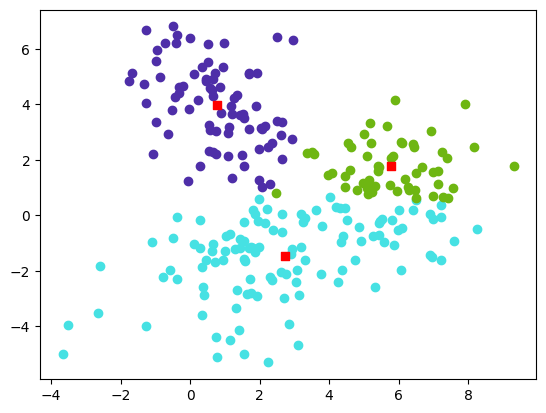

In [43]:
output = bkmeans(X, 3, 10, True)

In [44]:
print(output)

[2. 2. 1. 2. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 2. 0. 1. 0. 0. 1. 1.
 0. 2. 2. 0. 2. 0. 1. 0. 0. 1. 2. 2. 1. 0. 0. 2. 0. 1. 2. 1. 0. 0. 0. 0.
 1. 2. 1. 0. 2. 2. 1. 1. 2. 2. 0. 1. 0. 2. 0. 2. 2. 2. 1. 1. 0. 0. 0. 0.
 0. 2. 0. 2. 2. 2. 1. 0. 2. 0. 2. 0. 0. 0. 1. 0. 0. 2. 2. 0. 2. 1. 2. 2.
 0. 1. 1. 0. 2. 1. 2. 0. 0. 1. 1. 2. 0. 2. 0. 1. 0. 0. 1. 2. 1. 2. 0. 0.
 0. 0. 2. 1. 2. 2. 1. 2. 1. 1. 2. 0. 2. 2. 0. 2. 2. 0. 2. 0. 1. 2. 0. 2.
 2. 0. 0. 0. 1. 2. 0. 0. 0. 2. 2. 2. 0. 0. 2. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 0. 0. 2. 2. 2. 0. 0. 0. 1. 2. 1. 2.
 0. 2. 0. 0. 0. 2. 2. 0. 1. 2. 1. 0. 0. 0. 0. 2. 1. 1. 2. 2. 0. 1. 2. 2.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 2. 1. 2. 0. 1. 0. 0. 0. 0. 0. 2. 0. 2. 2.
 0. 0. 2. 0. 2. 0. 2. 2. 0. 0.]


For an easier use, I have implemented a class BisectingKMeans in order to be able to call it later.

# Exercise 2.1

The three datasets that I have choosen which contains:
- More than 1000 entries
- More than 4 features
- Have labels

Are: 
- Minst: 1 000 entries for this dataset, 784 features and a label from 0 to 9
- WineQT: 1143 entries, 12 features, label of the wine quality
- Abalone Modified: I modified the abalone dataset en replaced the labels for "M", "F" and "I" by 0,1,2. 4177 entries, 8 features, 1 label which is the age. It made more sense than classifying it by gender eventually but this is possible as well.

In [45]:
import pandas as pd

# Load the dataset
df = pd.read_csv('mnist_1000.csv')

# Display the first few rows of the dataset
print(df.head())

   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [46]:
import pandas as pd

# Load the dataset
df = pd.read_csv('WineQT.csv')

# Display the first few rows of the dataset
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [47]:
import pandas as pd

# Load the dataset
df = pd.read_csv('abalone.csv')

# Display the first few rows of the dataset
print(df.head())

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [48]:
from sklearn.preprocessing import normalize
# Mnist
mnist_data = np.loadtxt('mnist_1000.csv', delimiter=',', dtype='float64')
X_mnist = mnist_data[:,1:]
y_mnist = mnist_data[:,0]
X_mnist = normalize(X_mnist, norm="l1")

# WineQT
wine_data = np.loadtxt('WineQT.csv', delimiter=',', dtype='float64', encoding='utf-8-sig', skiprows=1)
X_wine = wine_data[:, :11]
y_wine = wine_data[:, 11]
X_wine = normalize(X_wine, norm="l1")

# Abalone
abalone_data = np.loadtxt('abalone_modified.csv', delimiter=',', dtype='float64', encoding='utf-8-sig', skiprows=1)
X_aba = abalone_data[:, :8]
X_aba = normalize(X_aba, norm="l1")
y_aba = abalone_data[:, 8]

In [49]:
datasets = [mnist_data, wine_data, abalone_data]
dataset_names = ['Mnist', 'Wine', 'Abalone']
Xses = [X_mnist, X_wine, X_aba]
yses = [y_mnist, y_wine, y_aba]

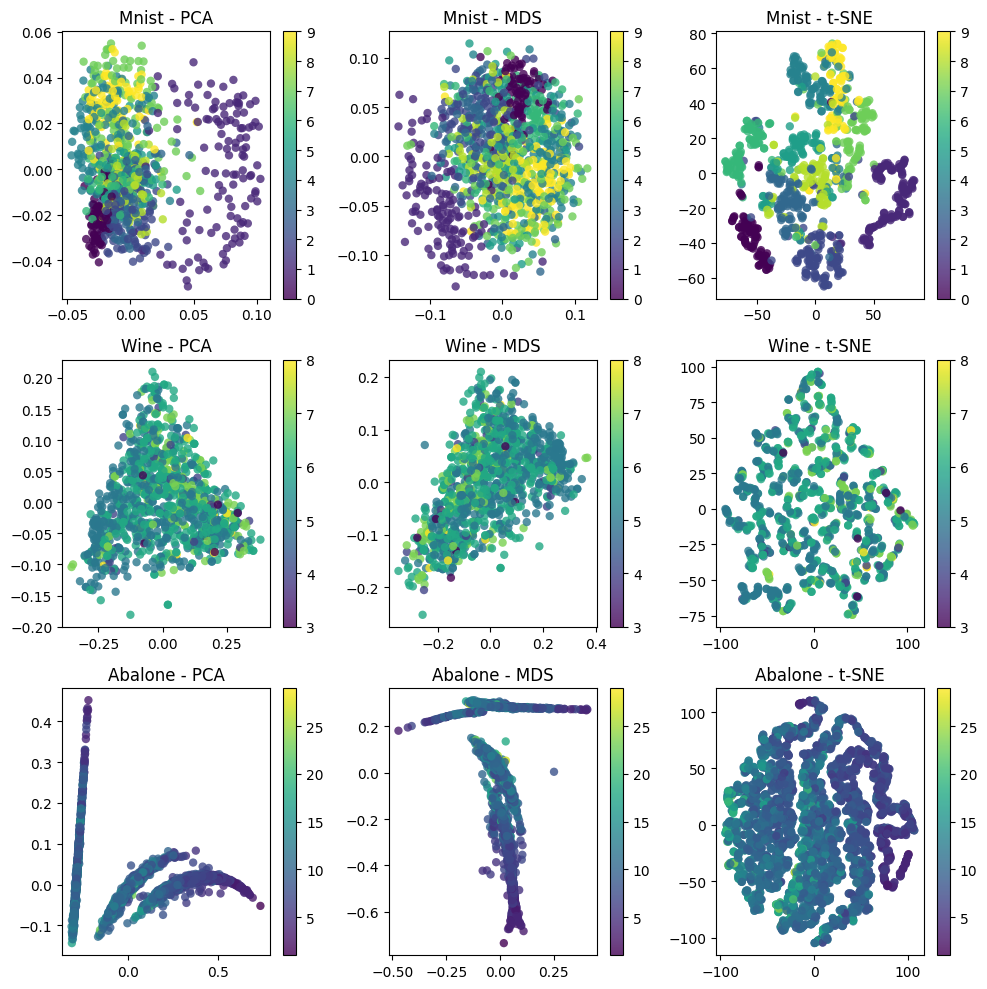

In [50]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from matplotlib import colormaps

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i in range(len(datasets)):
    #PCA
    pca = PCA(n_components=2)
    X_projected = pca.fit_transform(Xses[i])
    sc = axes[i, 0].scatter(X_projected[:, 0], X_projected[:, 1],c=yses[i], edgecolor='none', alpha=0.8, cmap='viridis')
    axes[i, 0].set_title(f'{dataset_names[i]} - PCA')
    fig.colorbar(sc, ax=axes[i, 0])

    #MDS
    mds = MDS(n_components=2, n_jobs=-1)
    y2 = mds.fit_transform(Xses[i])
    sc = axes[i, 1].scatter(y2[:, 0], y2[:, 1],c=yses[i], edgecolor='none', alpha=0.8, cmap='viridis')
    axes[i, 1].set_title(f'{dataset_names[i]} - MDS')
    fig.colorbar(sc, ax=axes[i, 1])

    #tSNE
    tsne = TSNE(n_components=2, perplexity=5)
    o1 = tsne.fit_transform(Xses[i])
    sc = axes[i, 2].scatter(o1[:, 0], o1[:, 1],c=yses[i], edgecolor='none', alpha=0.8, cmap='viridis')
    axes[i, 2].set_title(f'{dataset_names[i]} - t-SNE')
    fig.colorbar(sc, ax=axes[i, 2])

plt.tight_layout()
plt.show()

In my opinion, the technique that performed the best for Mnist was tSNE as we can see a clearer separation of results. It is even more obvious when we increase the number of entries in the Mnist dataset but for computational reasons, this one has been reduced.

The technique that worked the best for Wine is rather complex to say but once again, it is possible to see some kind of relationship in tSNE.

For Abalone, tSNE allows to find some relationships as well even if the reduction is hardly readable.

Interpretting the results for PCA and MDS becomes pretty complex. We can easily see a separation of the classes for Mnist by number but not that much significance for the others.

# Exercise 3.2

The techinque that I am going to choose is tSNE. 

In [51]:
from sklearn.preprocessing import normalize
# Mnist
mnist_data = np.loadtxt('mnist_1000.csv', delimiter=',', dtype='float64')
X_mnist = mnist_data[:,1:]
X_mnist = normalize(X_mnist, norm="l1")
y_mnist = mnist_data[:,0]

# WineQT
wine_data = np.loadtxt('WineQT.csv', delimiter=',', dtype='float64', encoding='utf-8-sig', skiprows=1)
X_wine = wine_data[:, :11]
X_wine = normalize(X_wine, norm="l1")
y_wine = wine_data[:, 11]

# Abalone
abalone_data = np.loadtxt('abalone_modified.csv', delimiter=',', dtype='float64', encoding='utf-8-sig', skiprows=1)
X_aba = abalone_data[:, :8]
X_aba = normalize(X_aba, norm="l1")
y_aba = abalone_data[:, 8]
print(y_aba.shape)

(4177,)


In [52]:
datasets = [mnist_data, wine_data, abalone_data]
dataset_names = ['Mnist', 'Wine', 'Abalone']
Xses = [X_mnist, X_wine, X_aba]
yses = [y_mnist, y_wine, y_aba]
cluster_number = [10, 10, 30]

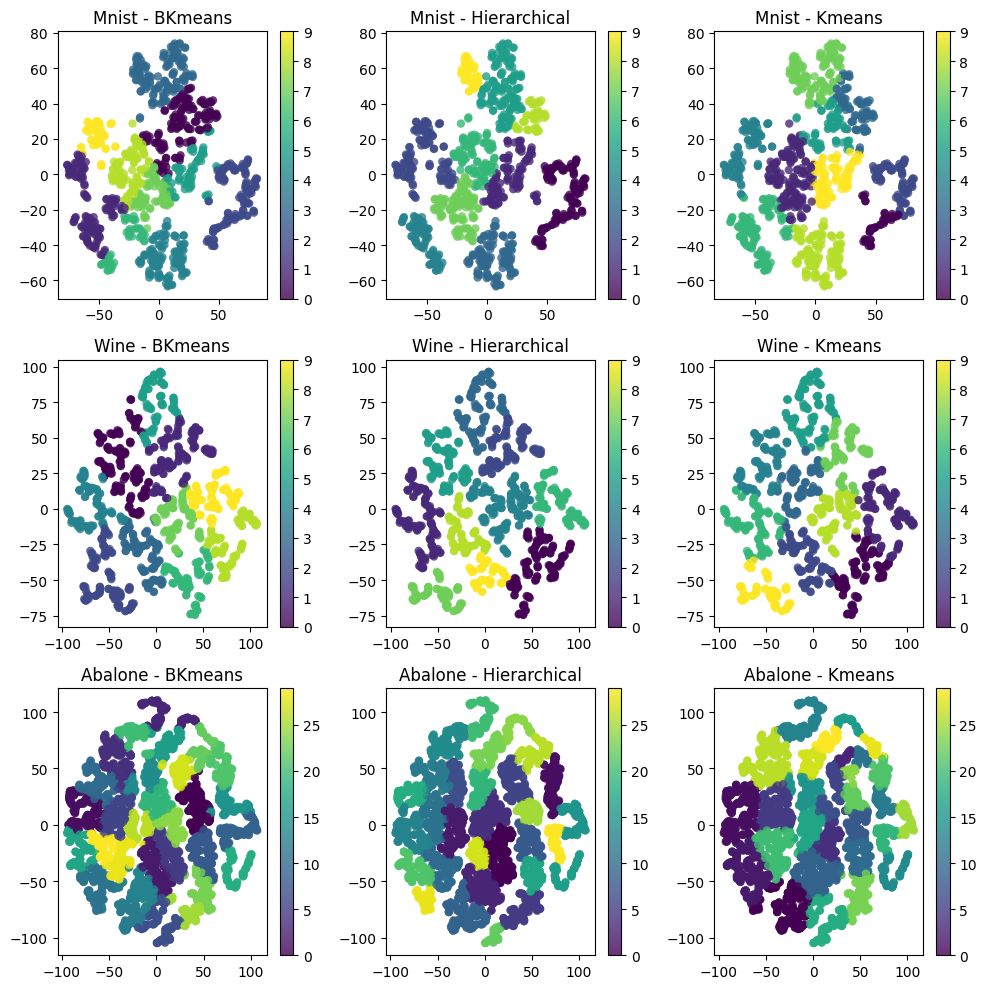

In [53]:
from sklearn.cluster import AgglomerativeClustering
import Kmeans, BisectingKMeans

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i in range(len(datasets)):
    #tSNE
    tsne = TSNE(n_components=2, perplexity=5)
    o1 = tsne.fit_transform(Xses[i])
    
    #Bkmeans
    bk = BisectingKMeans.BisectingKMeans()
    output = bk.bkmeans(o1, cluster_number[i], 10, False)
    sc = axes[i, 0].scatter(o1[:, 0], o1[:, 1], c=output, edgecolor='none', alpha=0.8, cmap='viridis')
    axes[i, 0].set_title(f'{dataset_names[i]} - BKmeans')
    fig.colorbar(sc, ax=axes[i, 0])

    #MDS
    hierarchical = AgglomerativeClustering(n_clusters=cluster_number[i])
    y2 = hierarchical.fit_predict(o1)
    sc = axes[i, 1].scatter(o1[:, 0], o1[:, 1],c=y2, edgecolor='none', alpha=0.8, cmap='viridis')
    axes[i, 1].set_title(f'{dataset_names[i]} - Hierarchical')
    fig.colorbar(sc, ax=axes[i, 1])

    # Kmean
    # km = Kmeans.Kmeans(K=3, max_iters=150, plot_steps=False)
    # y_pred = km.predict(o1)
    km = KmeansImpl.KmeansImpl()
    y_pred = km.kmeans(o1, centroids=cluster_number[i], iterations=10, show=False)
    sc = axes[i, 2].scatter(o1[:, 0], o1[:, 1],c=y_pred, edgecolor='none', alpha=0.8, cmap='viridis')
    axes[i, 2].set_title(f'{dataset_names[i]} - Kmeans')
    fig.colorbar(sc, ax=axes[i, 2])

plt.tight_layout()
plt.show()

To me, the best clustering technique for Mnist was hierarichal clustering. For Wine, it is pretty hard to say and for abalone as well as they feel randomly separated.

For Mnist, it seems as if hierarichal clustering is the one that respects the most the repartition of data while the other dataset feel divided in a random way (or geographical way).

As said, I think that for mnist, it is easier to separate them as the output is reatively easy to differentiate (numbers). 

For wine, it feels as if the reduction has not been made according to the grades that each wine received but on other criteria.
For the abalone, we see that younger abalone are on the right side but once again, the dispertion is not as clearly established as what Mnist is. 

## Trying other classifications

Here I am trying the classification for the Abalone using the gender.

In [54]:
from sklearn.preprocessing import normalize

# Abalone
abalone_data = np.loadtxt('abalone_modified.csv', delimiter=',', dtype='float64', encoding='utf-8-sig', skiprows=1)
X_aba = abalone_data[:, 1:]
X_aba = normalize(X_aba, norm="l1")
y_aba = abalone_data[:, 0]

datasets = [abalone_data]
dataset_names = ['Abalone']
Xses = [X_aba]
yses = [y_aba]
cluster_number = [3]

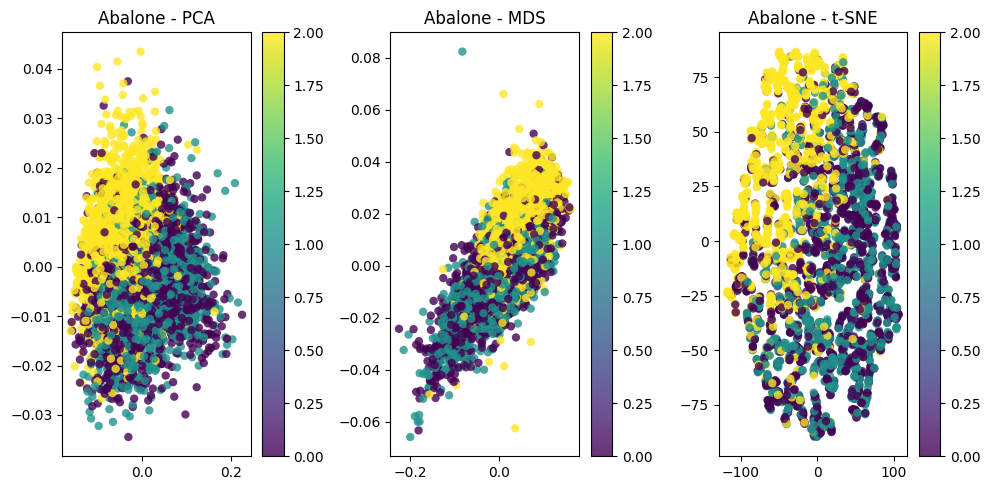

In [55]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from matplotlib import colormaps

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for i in range(len(datasets)):
    #PCA
    pca = PCA(n_components=2)
    X_projected = pca.fit_transform(Xses[i])
    sc = axes[0].scatter(X_projected[:, 0], X_projected[:, 1],c=yses[i], edgecolor='none', alpha=0.8, cmap='viridis')
    axes[0].set_title(f'{dataset_names[i]} - PCA')
    fig.colorbar(sc, ax=axes[0])

    #MDS
    mds = MDS(n_components=2, n_jobs=-1)
    y2 = mds.fit_transform(Xses[i])
    sc = axes[1].scatter(y2[:, 0], y2[:, 1],c=yses[i], edgecolor='none', alpha=0.8, cmap='viridis')
    axes[1].set_title(f'{dataset_names[i]} - MDS')
    fig.colorbar(sc, ax=axes[1])

    #tSNE
    tsne = TSNE(n_components=2, perplexity=5)
    o1 = tsne.fit_transform(Xses[i])
    sc = axes[2].scatter(o1[:, 0], o1[:, 1],c=yses[i], edgecolor='none', alpha=0.8, cmap='viridis')
    axes[2].set_title(f'{dataset_names[i]} - t-SNE')
    fig.colorbar(sc, ax=axes[2])

plt.tight_layout()
plt.show()

We see a clear separation in terms of gender here for the abalone but once again, it gets pretty complicated to analyze the results.